In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
df.info()#checking column datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


No null columns

data distribution seems normal

Let's visualize it


C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

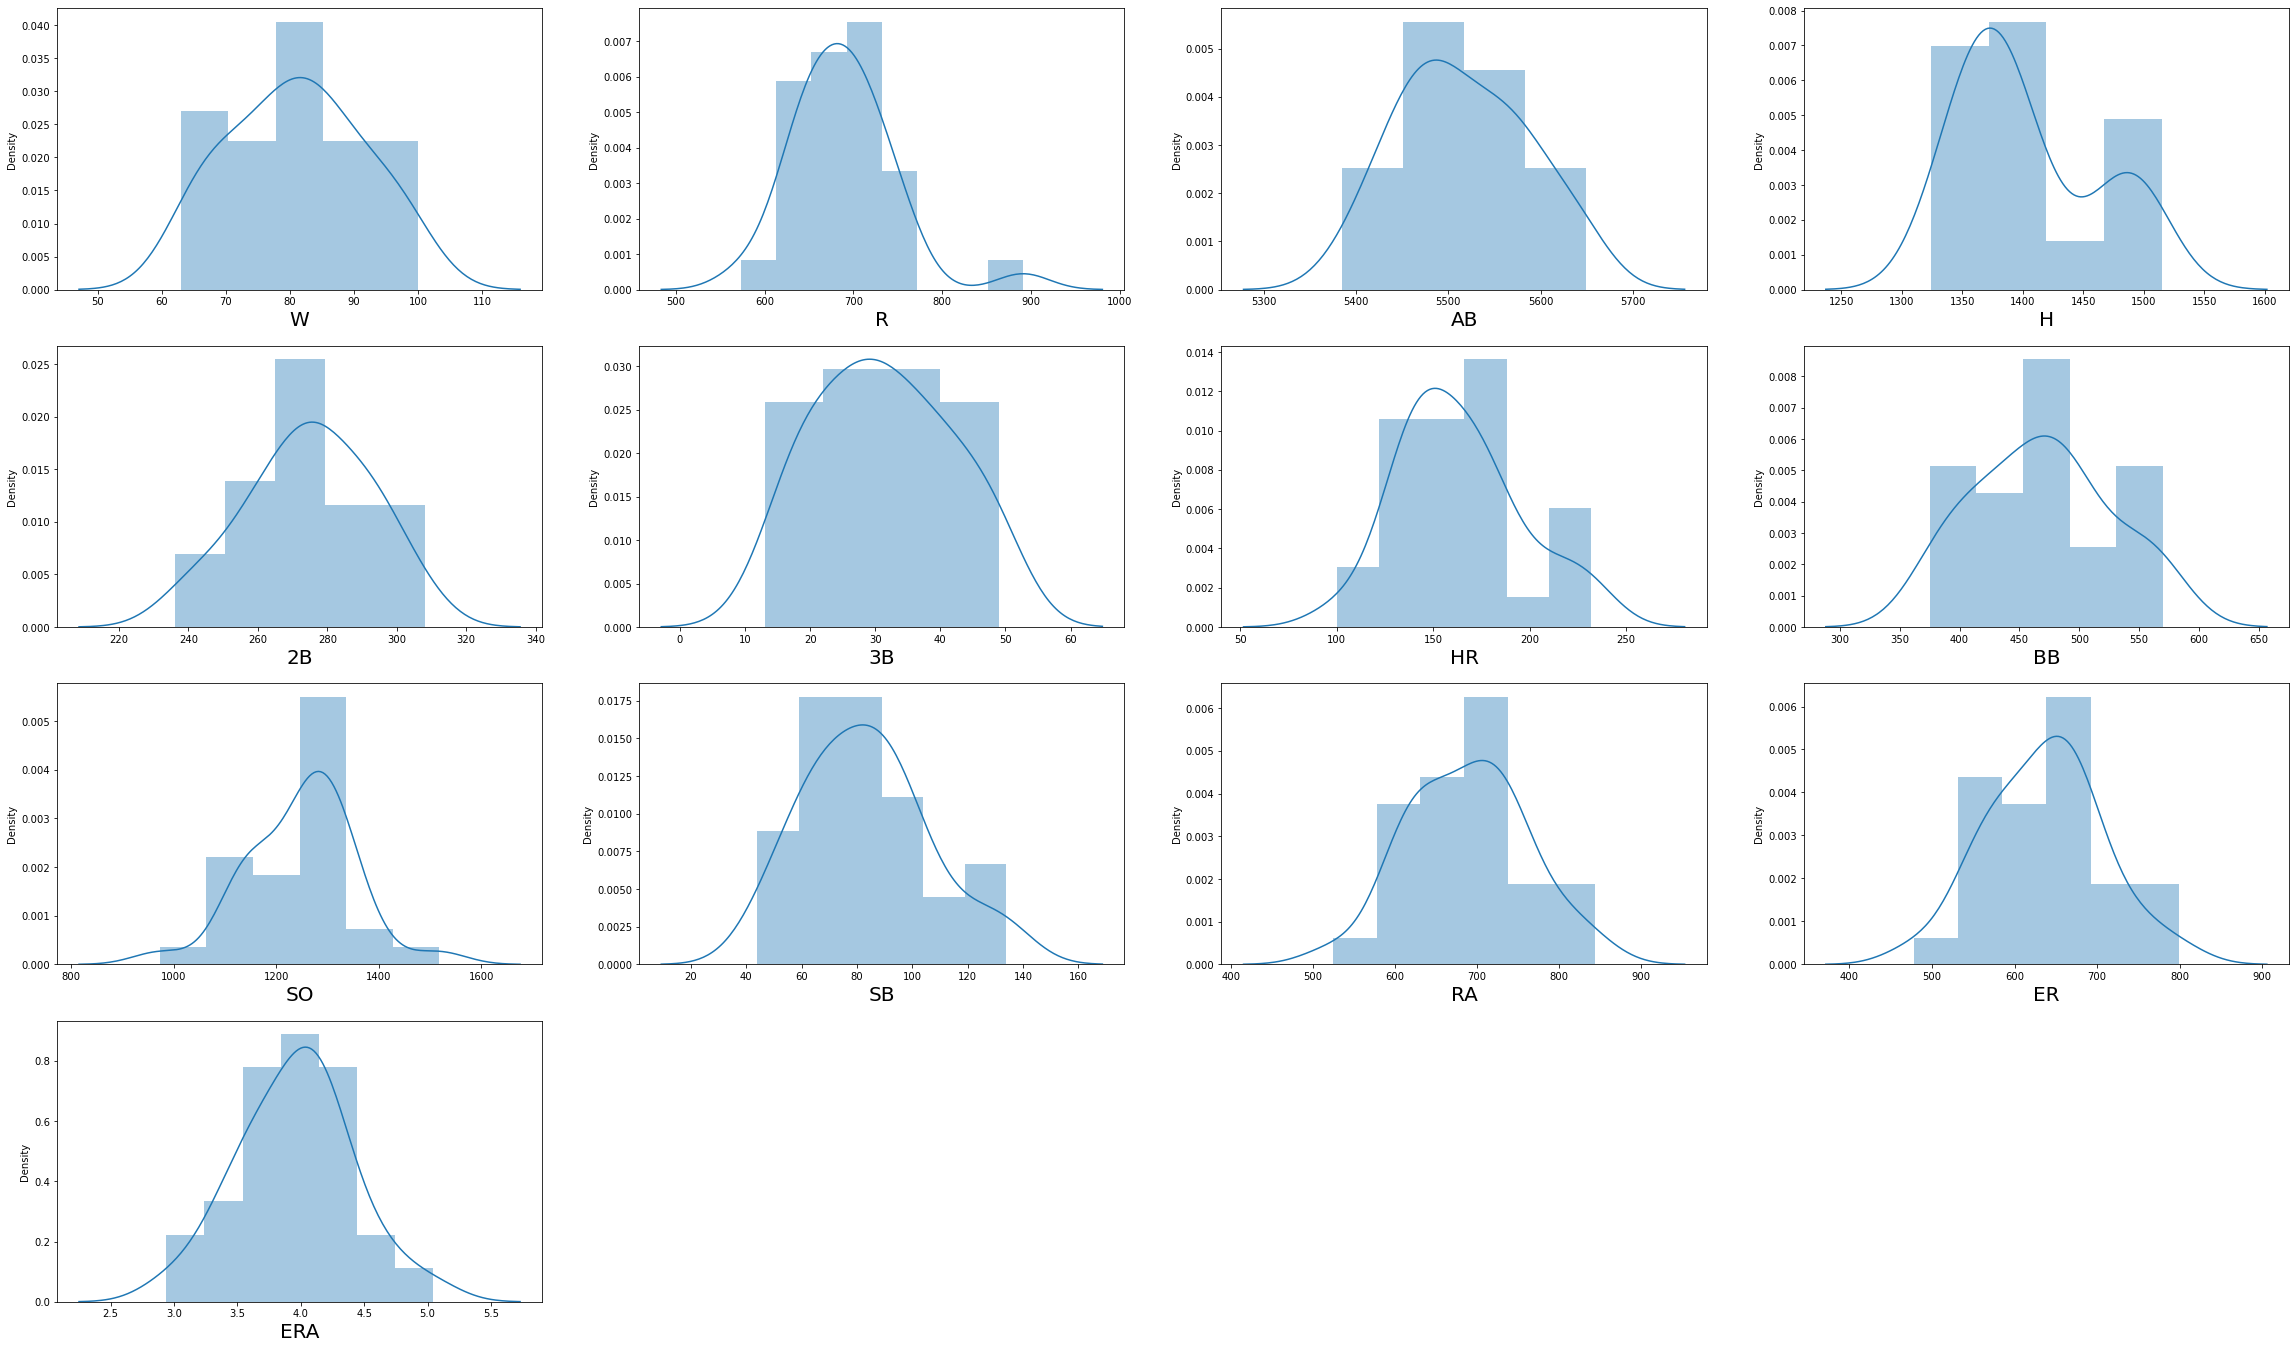

In [9]:
plt.figure(figsize=(40,30),facecolor='white')#checking data distribution wheather its normal (bell shape )
plotnumber=1
for column in df:
    if plotnumber<=13:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1  
plt.show()

Data distribution seems normal for every column
there may be few outliers in R and H

### Let's check for Multicollinearity

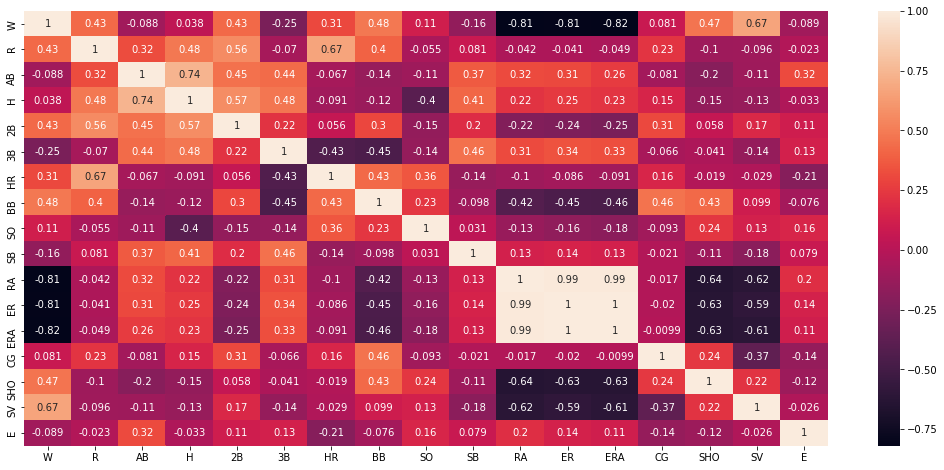

In [15]:
corr=df.corr()
plt.figure(figsize=(18,8))
sns.heatmap(data=corr,annot=True)
plt.show()

(ER , RA) and (ERA , RA) are highly positivly correlated with each other.

(RA,ER,ERA) are negativly correlated with target column.

SV is positivly correlated with target column.

H and AB are positivly correlated.


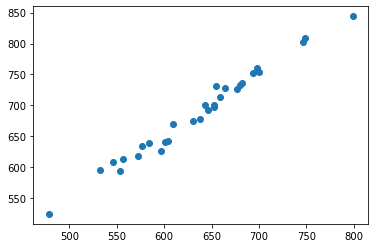

In [17]:
#Let's confirm it
plt.scatter(df['ER'],df['RA'])
plt.show()
#both are positivly correlated

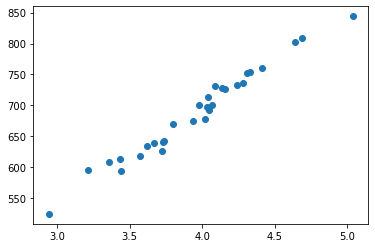

In [18]:
#Let's confirm it
plt.scatter(df['ERA'],df['RA'])
plt.show()
#both are positivly correlated

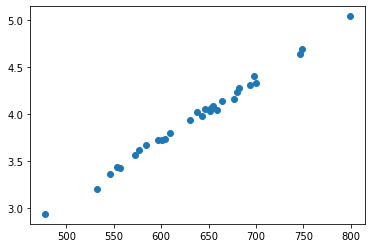

In [19]:
#Let's confirm it
plt.scatter(df['ER'],df['ERA'])
plt.show()
#both are positivly correlated

In [20]:
#let's remove ER as it has score one with ERA
df.drop(columns=['ER'],axis=1,inplace=True)

In [21]:
df.drop_duplicates() #No duplicate entry.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97


In [22]:
X=df.drop(columns=['W'],axis=1)
y=df.W

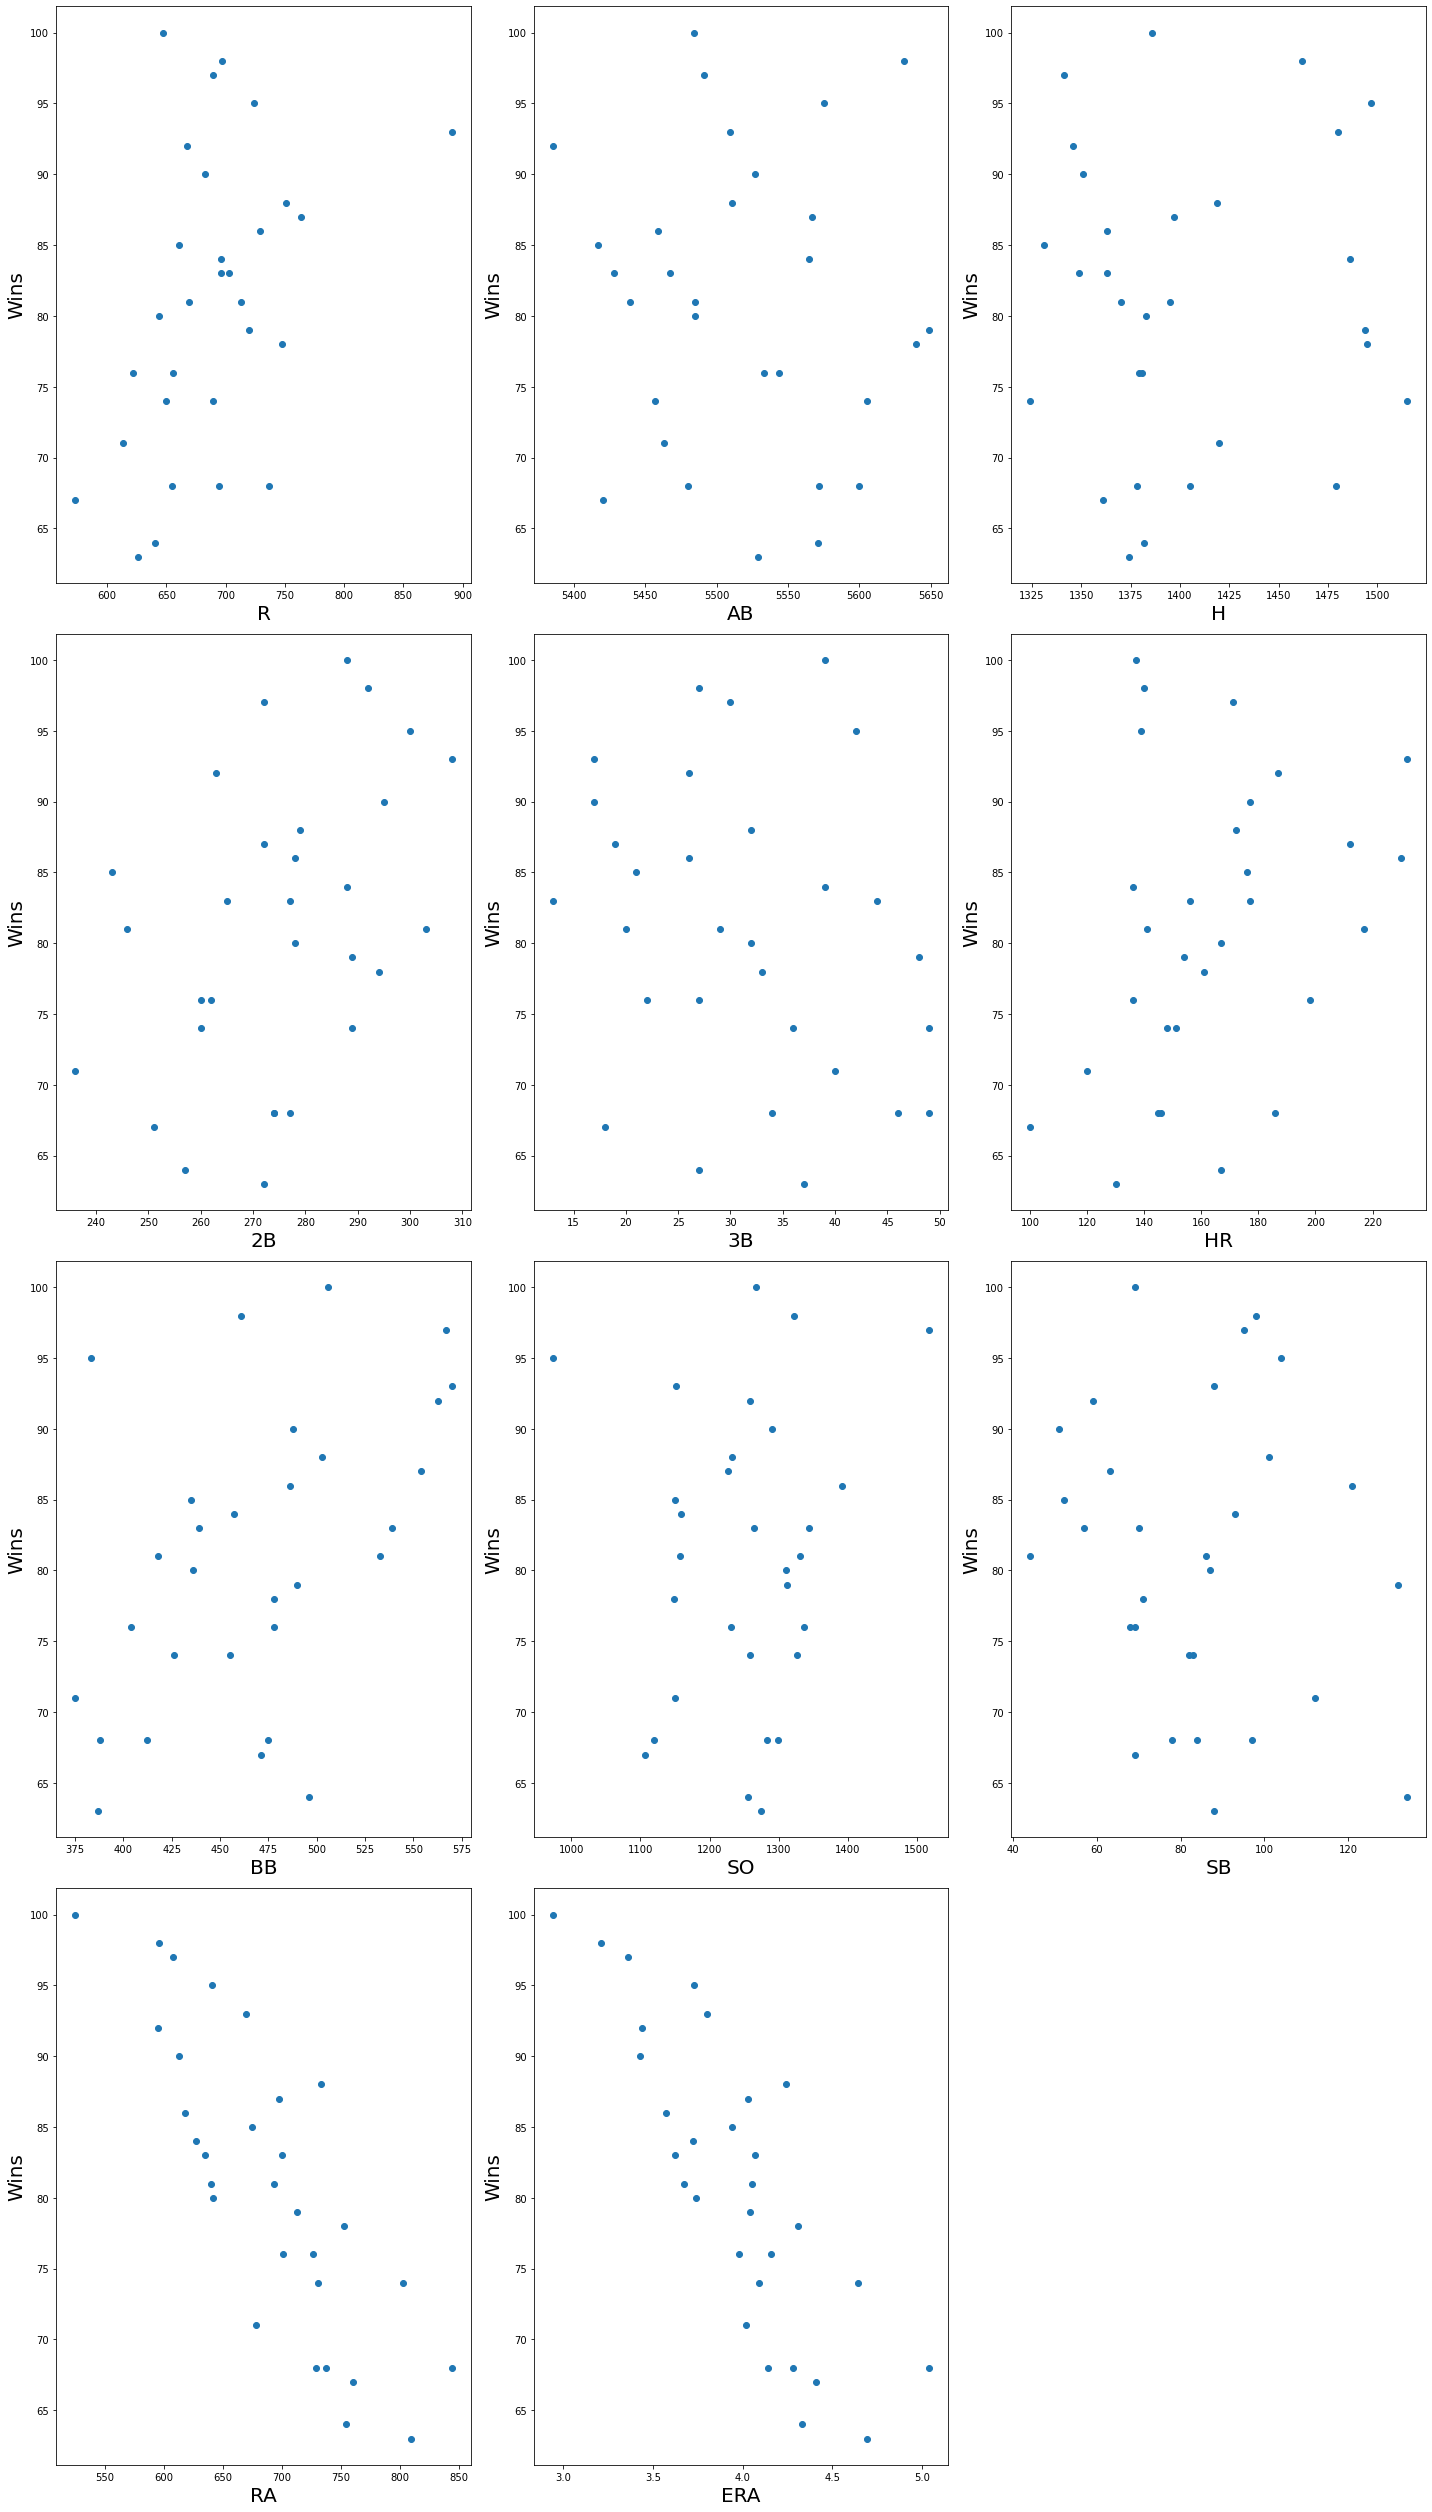

In [24]:
#visualizing data relation between feature and label
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel("Wins",fontsize=20)
    plotnumber+=1
plt.tight_layout()

When Runs scored are between 650 to 750 wins are maximum

RA and ERA have negative inverse relation with wins.

Base on ball(BB) have positive relation with W.


### Let's check for outliers using box plot

C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91945\Anaconda3\lib\si

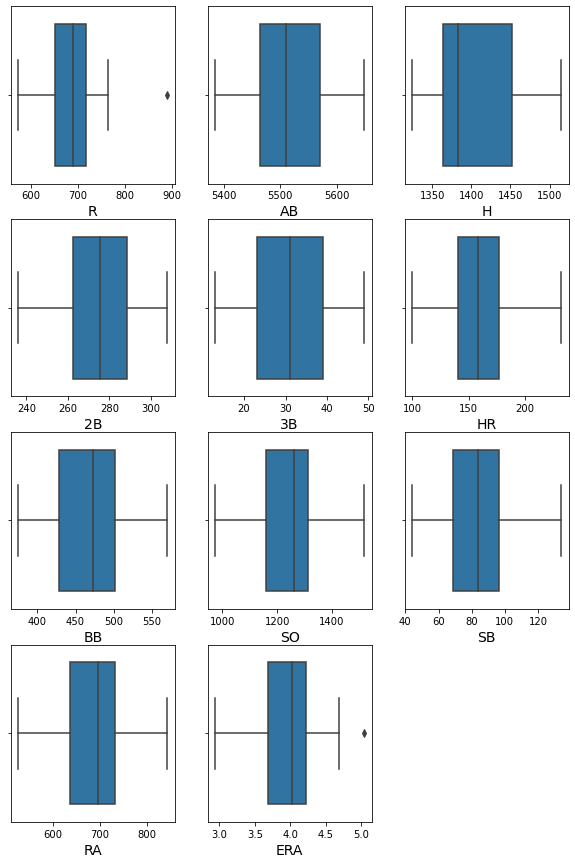

In [25]:
#plotting outliers using boxplot
plt.figure(figsize=(10,15),facecolor='white')
plotnumber=1
for column in X:
    if plotnumber<=11:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(X[column],orient='V')
        plt.xlabel(column,fontsize=14)
    plotnumber+=1  
plt.show()

One Outlier in Runs scored and Earned run average.

In [26]:
from scipy.stats import zscore #taking into consideration 99.7% data
z = np.abs(zscore(df))
df_new = df[(z<3).all(axis = 1)]
df_new

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,4.24,5,9,45,119


### Let's check for skewness

In [27]:
df_new.skew()
#threshold=+_.60

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Columns H,CG,SV,E have skewness 

Let's remove it using yeo-johnson method.

In [28]:
X=df_new.drop(columns=['W'],axis=1)
y=df_new.W

In [30]:
from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')


C:\Users\91945\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


### Let's Normalise data using StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.20,random_state=343)

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(mean_absolute_error(y_test,y_pred))

print(mean_squared_error(y_test,y_pred))

print(np.sqrt(mean_squared_error(y_test,y_pred)))

3.3746295870674032
18.667219721930532
4.320557802174452


In [37]:
#adjusted r2_score train _data
print("Train_score:",lr.score(X_train,y_train))
#r2_score for test _data
print("Test_score:",lr.score(X_test,y_test))
#Model is neither overfit nor underfit

Train_score: 0.9513459012117201
Test_score: 0.8695866660218321


In [41]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(lr, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 4.305841370724818


### Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))
#Model is overfit

Mean_squared_error: 6.848198059830532
train_score: 0.9186428224115627
test_score: 0.6723614593440714


In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(rf, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print('Cross validation error:',np.sqrt(np.mean(np.absolute(scores))))

Cross validation error: 6.664796571039008


### Support vector regressor

In [44]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",rf.score(X_train,y_train))
print("test_score:",rf.score(X_test,y_test))
#Model is overfit

Mean_squared_error: 12.710949347215323
train_score: 0.9186428224115627
test_score: 0.6723614593440714


In [45]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(reg, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("Cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

Cross_validation_Mean_squared_error: 9.609268619288395


### KNeighborsRegressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 8.58110812579976
train_score: 0.4965912449257259
test_score: 0.4855666601979429


In [47]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 6.711076043874534


### Bagging Regressor

In [48]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, y_train)
y_pred=bag_regressor.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 6.7557383016218155
train_score: 0.4965912449257259
test_score: 0.4855666601979429


In [49]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(bag_regressor, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 7.072929614617507


### ADA Boost Regressor

In [50]:
from sklearn.ensemble import AdaBoostRegressor
model_ABR = AdaBoostRegressor()
model_ABR.fit(X_train, y_train)
y_pred=model_ABR.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

Mean_squared_error: 6.262487524937675
train_score: 0.4965912449257259
test_score: 0.4855666601979429


In [51]:
#printing cross validation score
cv = KFold(n_splits=10, random_state=1, shuffle=True)




scores = cross_val_score(model_ABR, X_scaled, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("cross_validation_Mean_squared_error:",np.sqrt(np.mean(np.absolute(scores))))

cross_validation_Mean_squared_error: 5.952340400655517


### XGBoost Regressor

In [55]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)

print("Mean_squared_error:",(np.sqrt(mean_squared_error(y_test,y_pred))))
print("train_score:",model.score(X_train,y_train))
print("test_score:",model.score(X_test,y_test))

[12:25:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
Mean_squared_error: 37.617391495517516
train_score: 0.4965912449257259
test_score: 0.4855666601979429


### Best model with least diff between cross validation error and RMSE is Linear Regression with good training and testing data fitting



Since, linear regressor doen't have parameter to tune we will proceed with saving the model.

In [56]:
#saving the model in local system
import pickle
filename='finalized_baseball_model.pickle'
pickle.dump(rf,open(filename,'wb'))

### End